In [120]:
! pip install plotly

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import sys
import os
from pathlib import Path
sys.path.append("..")
from utils import build_features

import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

%load_ext autoreload
%autoreload 2

In [121]:
comp_prices_df = pd.read_csv("../data/comp_prices.csv")
sales_df = pd.read_csv("../data/sales.csv")

In [122]:
sales_df.columns = list(map(str.lower, sales_df.columns))
sales_df

,prod_id,date_order,qty_order,revenue
0,P6,2015-08-02,1.0,1808.99
1,P6,2015-08-17,1.0,1674.00
2,P6,2015-08-17,1.0,1673.95
3,P6,2015-08-11,1.0,1674.00
4,P6,2015-08-17,1.0,1674.00
...,...,...,...,...
351086,P3,2015-09-24,1.0,1008.83
351087,P3,2015-10-13,2.0,2333.92
351088,P3,2015-09-24,1.0,1311.81
351089,P3,2015-10-13,1.0,1166.96


In [123]:
sales_df["value_per_item"] = sales_df.revenue / sales_df.qty_order

daily_sales_df = sales_df.groupby(["date_order", "prod_id", "value_per_item"])\
    .agg({"qty_order" : sum})\
    .reset_index()\
    .sort_values(["prod_id", "date_order"])

daily_sales_df[(daily_sales_df.date_order == "2015-10-14") & (daily_sales_df.prod_id == "P9")]

,date_order,prod_id,value_per_item,qty_order
9882,2015-10-14,P9,341.10,8.0
9883,2015-10-14,P9,344.89,1.0
9884,2015-10-14,P9,356.56,1.0
9885,2015-10-14,P9,360.05,16.0
9886,2015-10-14,P9,379.00,557.0
9887,2015-10-14,P9,388.65,3.0
9888,2015-10-14,P9,399.99,1.0
9889,2015-10-14,P9,449.00,3.0


In [124]:
comp_prices_df.columns = list(map(str.lower, comp_prices_df.columns))
comp_prices_df

,prod_id,date_extraction,competitor,competitor_price,pay_type
0,P6,2015-01-30 08:11:38,C3,1898.00,1
1,P6,2015-01-30 08:11:38,C1,1898.00,1
2,P6,2015-01-30 08:11:38,C6,1999.90,1
3,P6,2015-01-31 20:10:14,C2,1894.88,2
4,P6,2015-01-31 20:10:14,C3,1894.88,2
...,...,...,...,...,...
50109,P5,2015-10-11 20:10:34,C1,819.00,2
50110,P5,2015-10-11 20:10:34,C2,853.52,2
50111,P5,2015-10-12 08:11:27,C2,853.52,1
50112,P5,2015-10-12 08:11:27,C3,819.00,1


In [125]:
sales_df[sales_df.prod_id == "P2"].drop_duplicates(["prod_id", "date_order", "value_per_item"])

,prod_id,date_order,qty_order,revenue,value_per_item
204132,P2,2015-06-23,1.0,649.00,649.00
204133,P2,2015-07-29,1.0,664.05,664.05
204134,P2,2015-07-31,1.0,664.05,664.05
204136,P2,2015-09-04,1.0,658.99,658.99
204137,P2,2015-07-30,1.0,664.05,664.05
...,...,...,...,...,...
267312,P2,2015-10-09,1.0,699.00,699.00
267369,P2,2015-09-30,1.0,616.23,616.23
267398,P2,2015-10-02,1.0,799.00,799.00
267437,P2,2015-10-12,1.0,616.23,616.23


Text(0.5, 0, '')

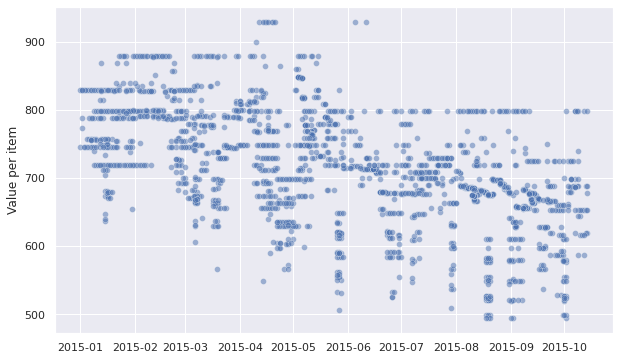

In [126]:
sales_df["date_order"] = pd.to_datetime(sales_df.date_order)
plot_df = sales_df[sales_df.prod_id == "P2"].drop_duplicates(["prod_id", "date_order", "value_per_item"])
plt.figure(figsize=(10,6))
sns.scatterplot(data=plot_df,
                x="date_order",
                y="value_per_item",
                alpha=0.5)
plt.ylabel("Value per item")
plt.xlabel("")

In [127]:
df = build_features(sales_df, comp_prices_df)
df = df[df.date != pd.to_datetime("2015-10-14")]

<AxesSubplot:xlabel='date', ylabel='price'>

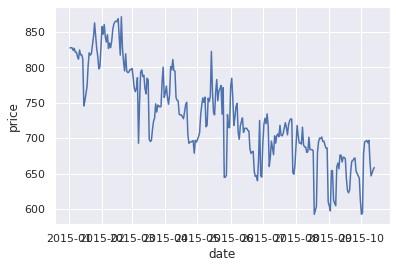

In [128]:
sns.lineplot(data=df[df.prod_id == "P2"], x="date", y="price")

In [129]:
plot_df = pd.concat([
 plot_df,
 df[["prod_id", "price", "date"]].assign(competitor="Americanas")
])
plot_df

,prod_id,date_order,qty_order,revenue,value_per_item,price,date,competitor
204132,P2,2015-06-23,1.0,649.00,649.00,NaN,NaT,NaN
204133,P2,2015-07-29,1.0,664.05,664.05,NaN,NaT,NaN
204134,P2,2015-07-31,1.0,664.05,664.05,NaN,NaT,NaN
204136,P2,2015-09-04,1.0,658.99,658.99,NaN,NaT,NaN
204137,P2,2015-07-30,1.0,664.05,664.05,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...
1886,P9,NaT,NaN,NaN,NaN,389.691600,2015-10-09,Americanas
1887,P9,NaT,NaN,NaN,NaN,391.380233,2015-10-10,Americanas
1888,P9,NaT,NaN,NaN,NaN,390.586437,2015-10-11,Americanas
1889,P9,NaT,NaN,NaN,NaN,391.779727,2015-10-12,Americanas


/opt/conda/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.



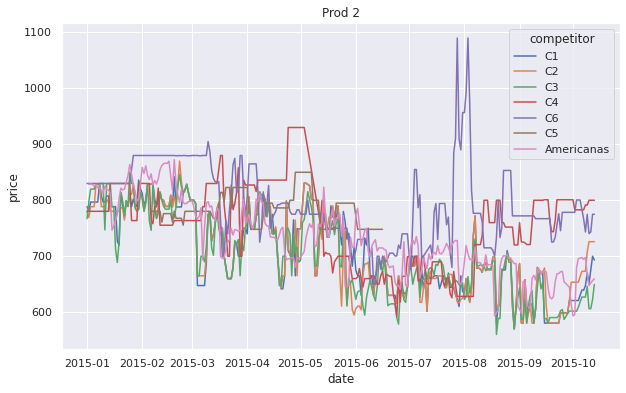

In [130]:
comp_prices_df["date"] = pd.to_datetime(comp_prices_df.date_extraction).dt.date
comp_prices_df = comp_prices_df[comp_prices_df.date != pd.to_datetime("2015-10-14")]

plt.figure(figsize=(10,6))
plot_df = comp_prices_df.drop_duplicates(["prod_id", "date", "competitor", "competitor_price"])\
    .groupby(["date", "prod_id", "competitor"])\
    .agg({"competitor_price" : "mean"})\
    .reset_index()\
    .rename(columns={"competitor_price" : "price"})
plot_df = pd.concat([
 plot_df,
 df[["prod_id", "price", "date"]].assign(competitor="Americanas")
]).reset_index()
plot_df["date"] = plot_df.date.apply(pd.to_datetime)
sns.lineplot(data=plot_df[plot_df.prod_id == "P2"],
            x="date",
            y="price",
            hue="competitor")
plt.title("Prod 2")
plt.show()

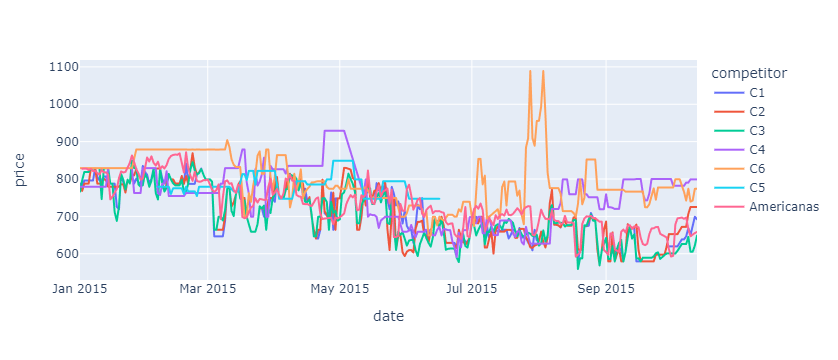

In [131]:
px.line(plot_df[plot_df.prod_id == "P2"], x="date", y="price", color="competitor")

In [132]:
plot_df[plot_df.prod_id == "P2"].reset_index()

,level_0,index,date,prod_id,competitor,price
0,0,0,2015-01-01,P2,C1,787.550000
1,1,1,2015-01-01,P2,C2,779.260000
2,2,2,2015-01-01,P2,C3,766.100000
3,3,3,2015-01-01,P2,C4,779.260000
4,4,4,2015-01-01,P2,C6,829.000000
...,...,...,...,...,...,...
1812,9107,487,2015-10-09,P2,Americanas,666.318983
1813,9108,488,2015-10-10,P2,Americanas,646.670000
1814,9109,489,2015-10-11,P2,Americanas,651.030000
1815,9110,490,2015-10-12,P2,Americanas,655.466346


<AxesSubplot:xlabel='date', ylabel='price'>

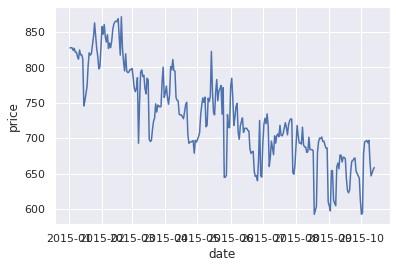

In [133]:
sns.lineplot(data=df[df.prod_id == "P2"], x="date", y="price")


In [134]:
comp_prices_df[comp_prices_df.duplicated(["date", "prod_id","competitor", "competitor_price"])]

,prod_id,date_extraction,competitor,competitor_price,pay_type,date
22,P6,2015-02-17 08:10:23,C1,1885.90,2,2015-02-17
23,P6,2015-02-17 08:10:23,C3,1859.00,2,2015-02-17
29,P6,2015-02-17 08:10:23,C6,1999.00,1,2015-02-17
31,P6,2015-02-17 08:10:23,C4,2199.00,1,2015-02-17
32,P6,2015-02-17 08:11:34,C2,1994.00,1,2015-02-17
...,...,...,...,...,...,...
50109,P5,2015-10-11 20:10:34,C1,819.00,2,2015-10-11
50110,P5,2015-10-11 20:10:34,C2,853.52,2,2015-10-11
50111,P5,2015-10-12 08:11:27,C2,853.52,1,2015-10-12
50112,P5,2015-10-12 08:11:27,C3,819.00,1,2015-10-12


In [135]:
comp_prices_df = comp_prices_df.drop_duplicates(["date", "prod_id","competitor", "competitor_price"])

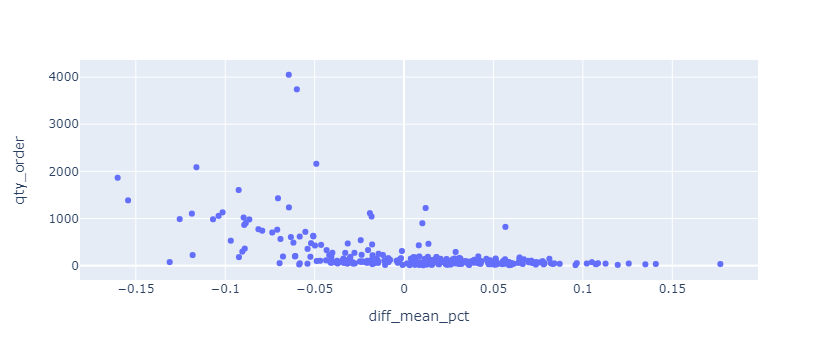

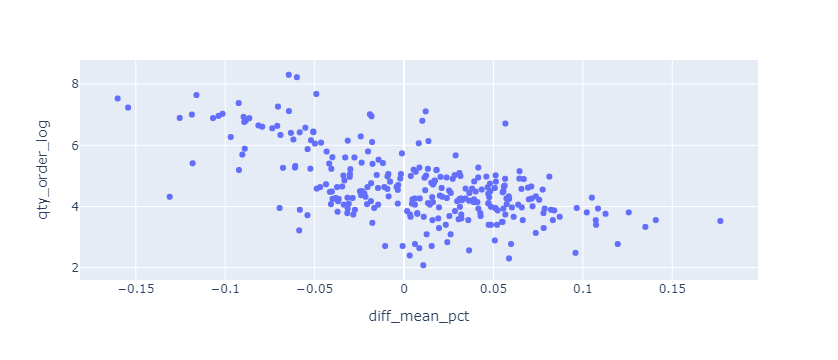

In [137]:
prod_id = "P2"
fig = px.scatter(df[df.prod_id == prod_id], x="diff_mean_pct", y="qty_order")
fig.show()

fig = px.scatter(df[df.prod_id == prod_id], x="diff_mean_pct", y="qty_order_log")
fig.show()
